## SOMMAIRE

## PARTIE 0 EXPLORATION DU JEUX DE DONNEES
#### a traitement chargement analyse univarié
#### b analyse bivarié avec la matrice de cooorélation
#### c analyse multivariées avec PCA

##  PARTIE 1 MODELE REGRESSION MULTIPLE
#### a PARTITION EN BASE TRAIN ET TEST
#### b CONSTRUCTION DU MODELE AVEC BASE TRAIN
#### c VALIDER LE MODELE AVEC TESTS SUR LES RESIDUS (shapiro etc distance cook )
#### d ETUDIER LA QUALITE DU MODELE SUR LA BASE TEST
#### e CALCUL LES COEFFICIENTS FINAUX DU MODDELE CHOISI 
#### f Calcul les valeurs manquante avec le modele à l'aide des coefficient finaux

##  PARTIE 2 MODELE REGRESSION LOGISTIQUE  
   
   
#### b CONSTRUCTION DU MODELE AVEC BASE TRAIN (éventuellement régression pas)
## 
#### d ETUDE DE LA QUALITE DU MODELE SUR LA BASE TEST ( matrice de confusion taux faux négatif, accuracy rate)
#### e CALCUL LES COEFFICIENT FINAUX DU MODELE CHOISI 
#### f matrice de confusion

## PARTIE 3 MODELE KMEANS

## PARTIE 4 MODELE KNN

## PARTIE 5 choix du modèle 

## PARTIE 6 TEST LE MODELE SUR L'ECHANTILLON




In [1]:
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import neighbors,model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white , normal_ad
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import shapiro
from statsmodels.api import Logit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## PARTIE 0 EXPLORATION DU JEUX DE DONN2ES

#### a) traitement chargement analyse univarié

Création du DataFrame

In [2]:
billet = pd.read_csv("billets.csv", sep = ';',)   

In [3]:
np.random.seed(123)

In [4]:
billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [5]:
registre=billet['is_genuine']

In [6]:
billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
billet.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Nous avons 37 valeurs manquantes à gérer 

##### Moyenne

In [8]:
billet.mean()

is_genuine        0.666667
diagonal        171.958440
height_left     104.029533
height_right    103.920307
margin_low        4.485967
margin_up         3.151473
length          112.678500
dtype: float64

##### Répartition des billets 

Text(0.5, 1.0, 'Répartition billets')

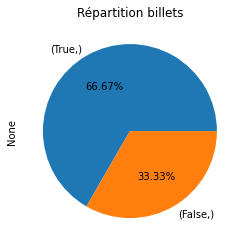

In [9]:
billet[['is_genuine']].value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Répartition billets')

In [10]:
billet.index[billet.isnull().any(axis=1)]

Int64Index([  72,   99,  151,  197,  241,  251,  284,  334,  410,  413,  445,
             481,  505,  611,  654,  675,  710,  739,  742,  780,  798,  844,
             845,  871,  895,  919,  945,  946,  981, 1076, 1121, 1176, 1303,
            1315, 1347, 1435, 1438],
           dtype='int64')

#### b) analyse bivarié avec la matrice de cooorélation

<Figure size 72x72 with 0 Axes>

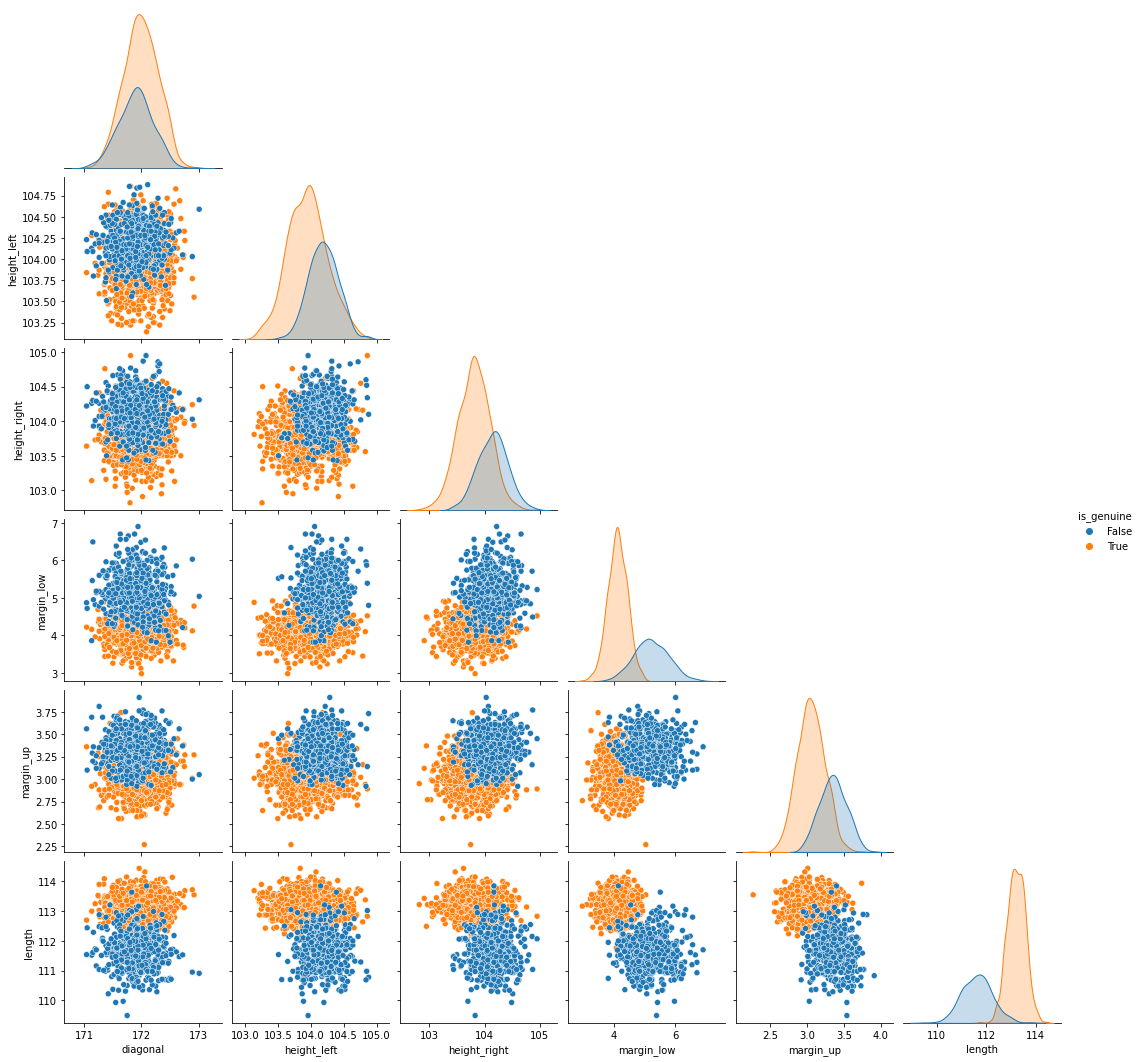

In [11]:
plt.figure(figsize=(1, 1))
sns.pairplot(billet,hue='is_genuine',corner=True)

##### Répartition des variables en fonction de la nature du billet 

<AxesSubplot:xlabel='is_genuine', ylabel='margin_up'>

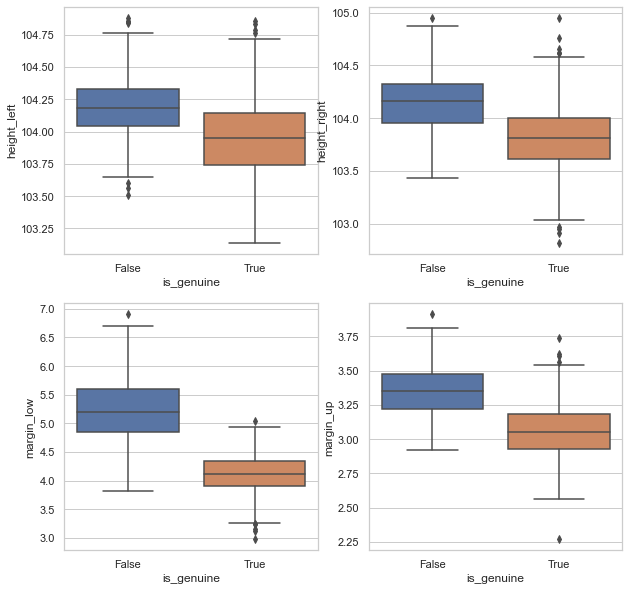

In [12]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(x="is_genuine", y="height_left", data=billet)
plt.subplot(222)
sns.boxplot(x="is_genuine", y="height_right", data=billet)
plt.subplot(223)
sns.boxplot(x="is_genuine", y="margin_low", data=billet)
plt.subplot(224)
sns.boxplot(x="is_genuine", y="margin_up", data=billet)

<AxesSubplot:xlabel='is_genuine', ylabel='length'>

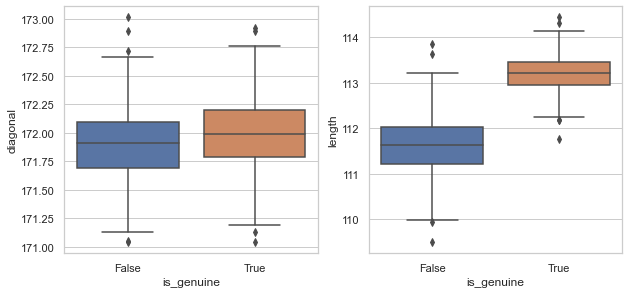

In [13]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(x="is_genuine", y="diagonal", data=billet)
plt.subplot(222)
sns.boxplot(x="is_genuine", y="length", data=billet)


##### Matrice de corrélation 

In [14]:
billetcorr=billet.loc[:,['diagonal','height_left','height_right','margin_low','margin_up','length']]

In [15]:
correl=billetcorr.corr()

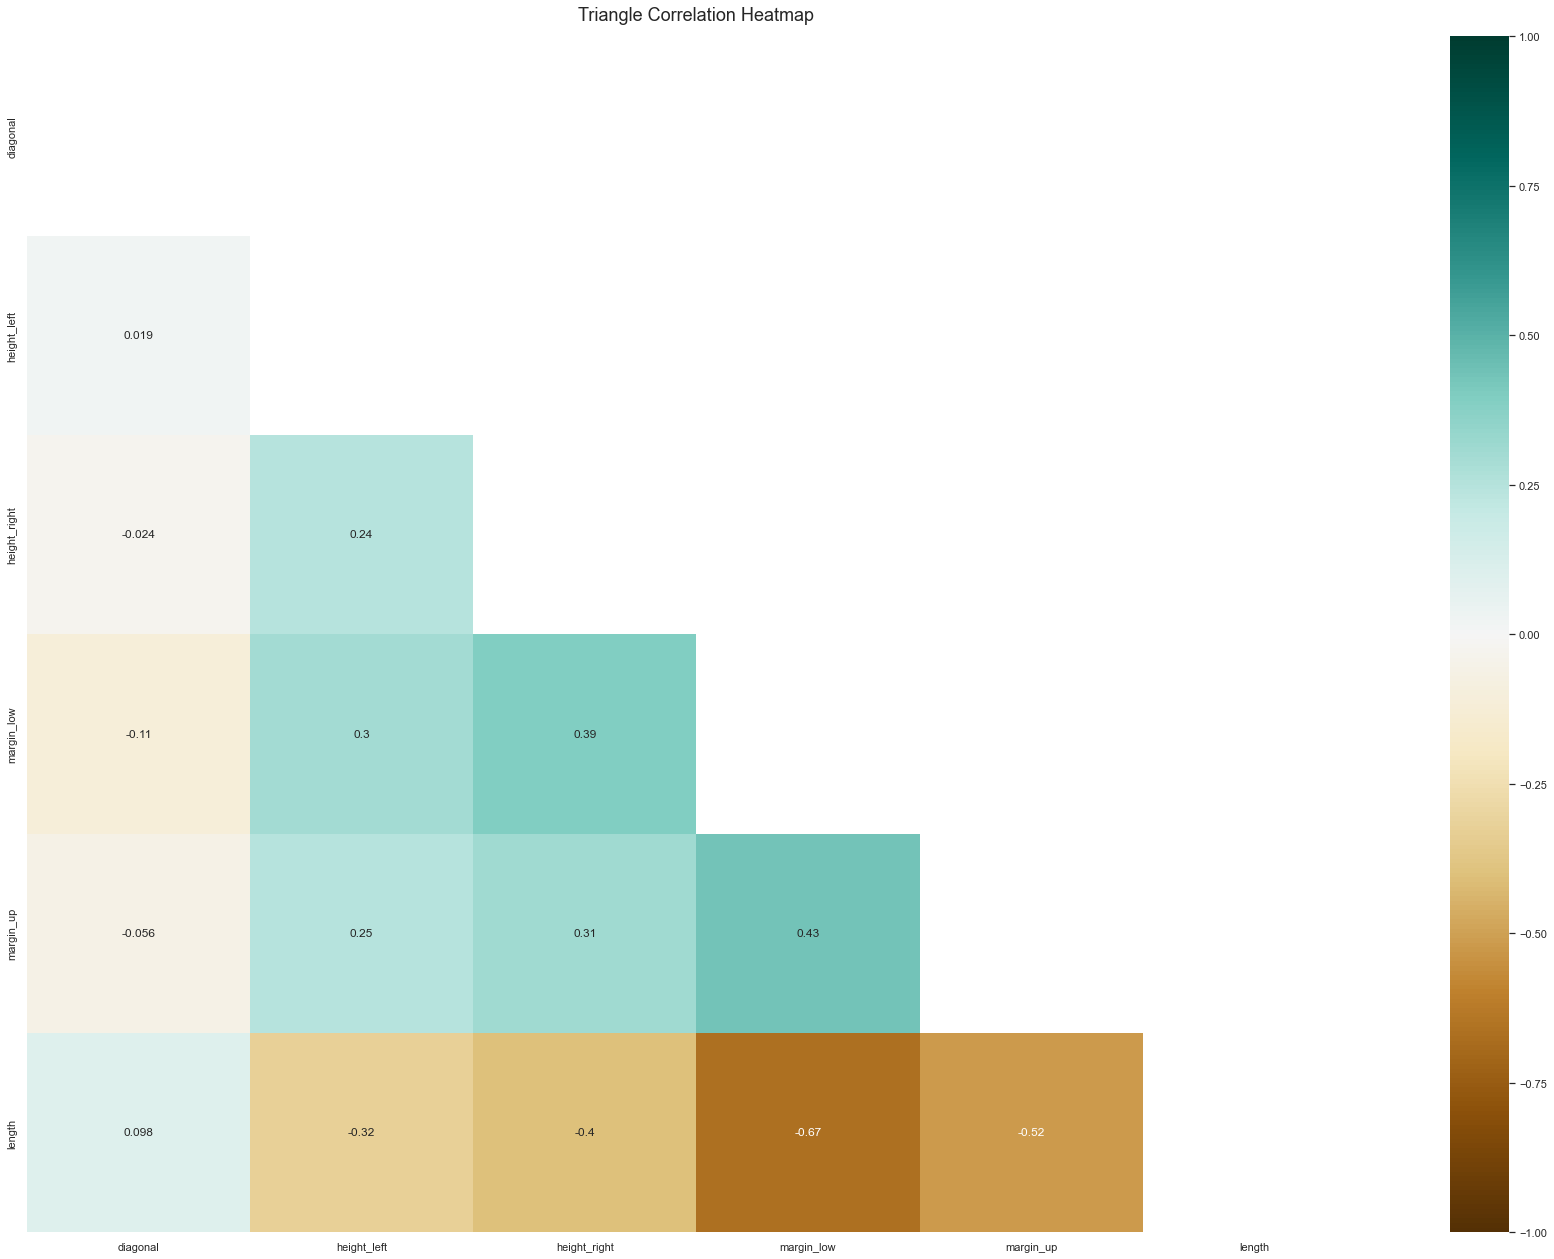

In [16]:
plt.figure(figsize=(30, 22))
mask = np.triu(np.ones_like(correl, dtype=np.bool))
heatmap = sns.heatmap(correl, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

#### c analyse multivariées avec PCA

In [17]:
ncomp=5

In [18]:
data_acp=billet.loc[:,['diagonal','height_left','height_right','margin_low','margin_up','length']]
data_acp= data_acp.dropna()
feature=data_acp.columns
code_billet = data_acp.index
X = data_acp.values

In [19]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [20]:
pca = decomposition.PCA(n_components=ncomp)
pca.fit(X_scaled)

PCA(n_components=5)

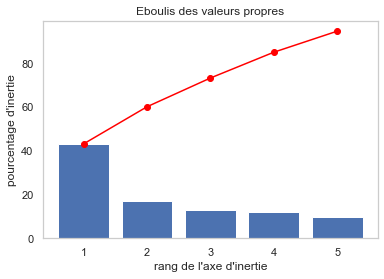

In [21]:
scree = pca.explained_variance_ratio_*100

plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.grid()
plt.show()

In [22]:
n = X_scaled.shape[0] # nb individus
p = X_scaled.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées

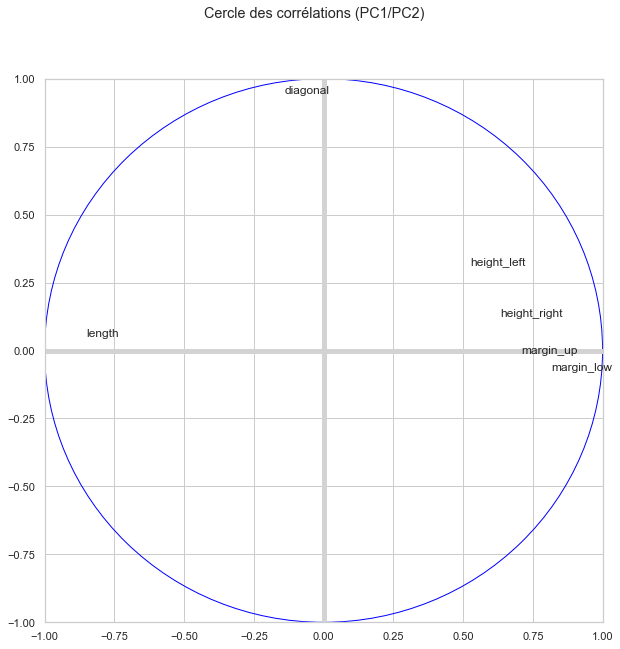

In [23]:
for k in range(p-1):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
    coordvar = pd.DataFrame({'id':feature , 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (10,10))
fig.suptitle("Cercle des corrélations (PC1/PC2)")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '-', linewidth = 5)
axes.axhline(y = 0, color = 'lightgray', linestyle = '-', linewidth = 5)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()


##### Protection des individus

In [24]:
X_projected = pca.transform(X_scaled)
proj=pd.DataFrame(X_projected)
proj["is_genuine"]=registre

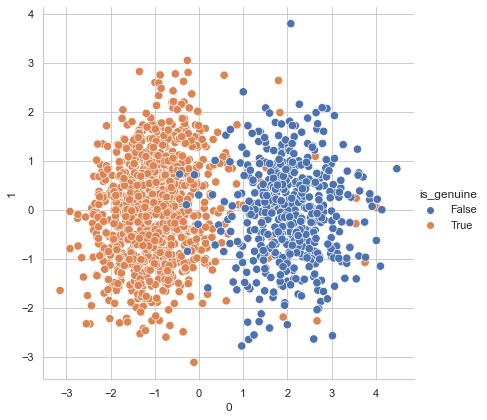

In [25]:
sns.relplot(x=0,y=1,hue="is_genuine",data=proj,height=6,s=70) ; plt.show()

##  PARTIE 1 MODELE REGRESSION MULTIPLE 

#### a) PARTITION EN BASE TRAIN ET TEST

In [26]:
'''Dataframe des valeurs manquantes '''
dfmanq=billet.loc[billet['margin_low'].isnull(),['is_genuine','diagonal','height_left','height_right','margin_up','length']]
'''Dataframe des valeurs pour regression'''
dfreg=billet.dropna()

In [27]:
# Paramètres partition des observations, pour que l'expérience soit reproductible à l'identique
np.random.seed(123)

Partition 

In [28]:
xtrain, xtest = train_test_split(dfreg, test_size=0.3)

In [29]:
xtrain.shape,xtest.shape

((1024, 7), (439, 7))

Création de DataFrame spécifique de x et y pour opérations futures 

In [30]:
ytrain=xtrain["margin_low"]

In [31]:
ytest=xtest["margin_low"]

In [32]:
xtrainfiltre=xtrain.drop(['margin_low'],  axis=1)

In [33]:
xtestfiltre=xtest.drop(['margin_low'],  axis=1)

#### b CONSTRUCTION MODELE AVEC BASE TRAIN en faisant une regression pas à pas pour obtenir un un modèle parcimonieux, 
### pour éviter le surapprentissage

In [34]:
# On construit le modèle complet (avec l'intercept et toutes les variables) full model
# Instanciation:
reglin = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length", data = xtrain)

# Calculs:
res_lin = reglin.fit()
print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          3.64e-146
Time:                        12:54:04   Log-Likelihood:                -703.05
No. Observations:                1024   AIC:                             1418.
Df Residuals:                    1018   BIC:                             1448.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       15.7295     11.804      1.333   

In [35]:
# Le modèle complet sur la base train, indique que l'intercept n'est pas significatif
# Regression pas à pas, on retire l'intercept
reglin = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length-1", data = xtrain)

# Calculs:
res_lin = reglin.fit()
print(res_lin.summary())

                                 OLS Regression Results                                
Dep. Variable:             margin_low   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          1.795e+04
Date:                Wed, 30 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:54:04   Log-Likelihood:                         -703.94
No. Observations:                1024   AIC:                                      1418.
Df Residuals:                    1019   BIC:                                      1443.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [36]:
# Le modèle sans intercept indique que la variable diagonal ne contribue pas significativement
# Regression pas à pas, on retire diagonal
reglin = smf.ols("margin_low ~ height_left + height_right + margin_up + length-1", data = xtrain)

# Calculs:
res_lin = reglin.fit()
print(res_lin.summary())

                                 OLS Regression Results                                
Dep. Variable:             margin_low   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          2.241e+04
Date:                Wed, 30 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:54:04   Log-Likelihood:                         -705.12
No. Observations:                1024   AIC:                                      1418.
Df Residuals:                    1020   BIC:                                      1438.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [37]:
# Notre modèle final plus parcimonieux sans dégradation de l'AIC, utilise les variables Height left , heigth rigth , Margin up et lenght

#### c VALIDER LE MODELE AVEC TESTS SUR LES RESIDUS (shapiro etc distance cook )

In [38]:
# La moyenne des residus
res_lin.resid.mean()

-2.353812379462389e-06

Moyenne très proche de 0

[Text(0.5, 0, 'Prédites'), Text(0, 0.5, 'Résiduelles')]

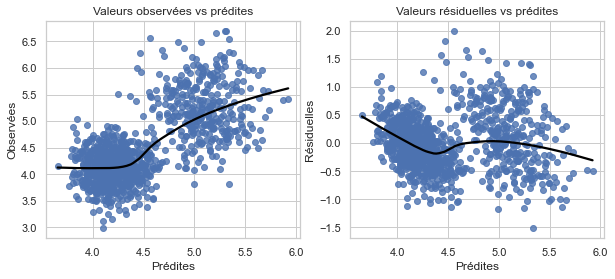

In [39]:
fitted_vals = res_lin.predict()
resids = res_lin.resid

fig, ax = plt.subplots(1,2,figsize=(10,4))
    
sns.regplot(x=fitted_vals, y=ytrain, lowess=True, ax=ax[0], line_kws={'color': 'black'})
ax[0].set_title("Valeurs observées vs prédites")
ax[0].set(xlabel="Prédites", ylabel="Observées")

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'black'})
ax[1].set_title("Valeurs résiduelles vs prédites")
ax[1].set(xlabel="Prédites", ylabel="Résiduelles")

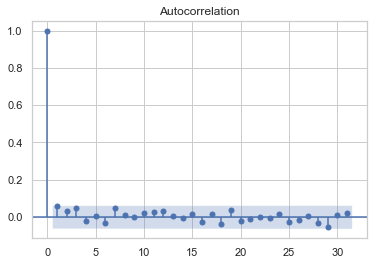

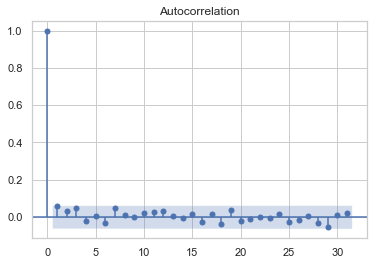

In [40]:
plot_acf(resids)

In [41]:
valpred=res_lin.predict(xtrainfiltre)

In [42]:
shapi = shapiro(ytrain-valpred)

In [43]:
shapi

ShapiroResult(statistic=0.9866150617599487, pvalue=4.613621484850228e-08)

p-value < 5%

Repartition de la valeur des erreurs 

<AxesSubplot:ylabel='Density'>

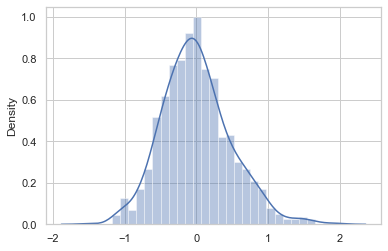

In [44]:
sns.distplot(ytrain-valpred)

Distribution symétrique et moyenne proche de 0

Calcul de la distance de cook

In [45]:
np.set_printoptions(suppress=True)
influence = res_lin.get_influence()
cooks = influence.cooks_distance
print(cooks)

(array([0.00124429, 0.00564828, 0.00046479, ..., 0.00059693, 0.00078535,
       0.00024192]), array([0.9999969 , 0.99993655, 0.99999957, ..., 0.99999929, 0.99999877,
       0.99999988]))


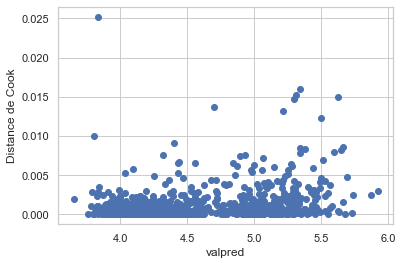

In [46]:
plt.scatter(valpred, cooks[0])
plt.xlabel('valpred')
plt.ylabel('Distance de Cook')
plt.show()

#### d ETUDIE LA QUALITE DU MODELE SUR LA BASE TEST

In [103]:
from sklearn.metrics import r2_score
# model evaluation for testing set
y_test_predict = res_lin.predict(xtest)
rmse = (np.sqrt(mean_squared_error(ytest, y_test_predict)))

 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Le RMSE est {}'.format(rmse))


La performance du modèle sur la base de test
--------------------------------------
Le RMSE est 3.9147451511957083
le score R2 est -68.67421013805453


#### e CALCUL LES COEFFICIENT FINAUX DU MODELE CHOISI (ici le modele complet) sur base test + train remis ensemble(toute la table)

In [48]:
# Instanciation:
reglin2 = smf.ols("margin_low ~ height_left + height_right + margin_up + length-1", data = dfreg)

# Calculs:
res_lin2 = reglin2.fit()
print(res_lin2.summary())

                                 OLS Regression Results                                
Dep. Variable:             margin_low   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          3.205e+04
Date:                Wed, 30 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:54:05   Log-Likelihood:                         -1005.2
No. Observations:                1463   AIC:                                      2018.
Df Residuals:                    1459   BIC:                                      2040.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

#### f Calcul les valeurs manquante avec le modele à l'aide des coefficient finaux


In [49]:
dfmanq['margin_low']=res_lin2.predict(dfmanq)

In [50]:
billet_comp= pd.concat([dfreg, dfmanq])

In [51]:
billet_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


In [52]:
billet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


##  PARTIE 2 MODELE REGRESSION LOGISTIQUE

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(billet_comp.drop(["is_genuine"],axis=1), billet_comp[["is_genuine"]], test_size=0.3)

In [54]:
# Introduction d'une constante 
xtrain = sm.add_constant(xtrain)
reglogi = Logit(endog=ytrain,exog=xtrain)
reslogi = reglogi.fit()
reslogi.summary2()

Optimization terminated successfully.
         Current function value: 0.018299
         Iterations 14


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.971      
Dependent Variable: is_genuine       AIC:              52.4272    
Date:               2022-11-30 12:54 BIC:              87.1231    
No. Observations:   1050             Log-Likelihood:   -19.214    
Df Model:           6                LL-Null:          -670.40    
Df Residuals:       1043             LLR p-value:      3.3192e-278
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     14.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|    [0.025    0.975] 
------------------------------------------------------------------
const        -504.6120 387.1890 -1.3033 0.1925 -1263.4885 254.2646
diagonal       -0.2674   1.8587 -0.1439 0.8856    -3.9104   3.3756
height_left    -2.3377   1.4797 -1.5799 0.1141    -5.2377   0.5624
height_right   -0.8683   1.4933 -0.5814 0.5609    -3.7951   2.0585
margin_low     -7.4994   1.7788 -4.2160 0.0000   -10.9858  -4.0131
margin_up     -12.9892   4.1521 -3.1284 0.0018   -21.1271  -4.8513
length          8.5284   1.8206  4.6844 0.0000     4.9601  12.0967
==================================================================

"""

In [55]:
# Proceder pas à pas : on enlève d'abord la diagonale

In [56]:
x2train=xtrain[["const","height_left","height_right","margin_low", "margin_up", "length"]]

In [57]:
reglogi2 = Logit(endog=ytrain,exog=x2train)
reslogi2 = reglogi2.fit()
reslogi2.summary2()

Optimization terminated successfully.
         Current function value: 0.018309
         Iterations 14


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.971      
Dependent Variable: is_genuine       AIC:              50.4480    
Date:               2022-11-30 12:54 BIC:              80.1873    
No. Observations:   1050             Log-Likelihood:   -19.224    
Df Model:           5                LL-Null:          -670.40    
Df Residuals:       1044             LLR p-value:      1.9758e-279
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     14.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|    [0.025    0.975] 
------------------------------------------------------------------
const        -546.0370 262.1093 -2.0832 0.0372 -1059.7617 -32.3123
height_left    -2.3191   1.4737 -1.5736 0.1156    -5.2076   0.5693
height_right   -0.8661   1.4967 -0.5787 0.5628    -3.7995   2.0673
margin_low     -7.3959   1.6013 -4.6186 0.0000   -10.5344  -4.2573
margin_up     -12.8104   3.9059 -3.2798 0.0010   -20.4659  -5.1550
length          8.4595   1.7339  4.8790 0.0000     5.0612  11.8578
==================================================================

"""

In [58]:
# Proceder pas à pas : on enlève "height_right"

In [59]:
x2train=x2train[["const","height_left","margin_low", "margin_up", "length"]]

In [60]:
reglogi2 = Logit(endog=ytrain,exog=x2train)
reslogi2 = reglogi2.fit()
reslogi2.summary2()

Optimization terminated successfully.
         Current function value: 0.018473
         Iterations 13


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.971      
Dependent Variable: is_genuine       AIC:              48.7929    
Date:               2022-11-30 12:54 BIC:              73.5756    
No. Observations:   1050             Log-Likelihood:   -19.396    
Df Model:           4                LL-Null:          -670.40    
Df Residuals:       1045             LLR p-value:      1.2217e-280
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     13.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.    z    P>|z|    [0.025     0.975] 
------------------------------------------------------------------
const       -646.8770 208.0752 -3.1089 0.0019 -1054.6969 -239.0572
height_left   -2.4252   1.4593 -1.6619 0.0965    -5.2853    0.4350
margin_low    -7.6667   1.5915 -4.8173 0.0000   -10.7860   -4.5475
margin_up    -13.0869   3.9170 -3.3411 0.0008   -20.7640   -5.4098
length         8.6722   1.7191  5.0445 0.0000     5.3028   12.0416
==================================================================

"""

In [61]:
# Proceder pas à pas : on enlève "height_left"

In [62]:
x2train=x2train[["const","margin_low", "margin_up", "length"]]

In [63]:
reglogi2 = Logit(endog=ytrain,exog=x2train)
reslogi2 = reglogi2.fit()
reslogi2.summary2()

Optimization terminated successfully.
         Current function value: 0.019915
         Iterations 13


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.969      
Dependent Variable: is_genuine       AIC:              49.8215    
Date:               2022-11-30 12:54 BIC:              69.6477    
No. Observations:   1050             Log-Likelihood:   -20.911    
Df Model:           3                LL-Null:          -670.40    
Df Residuals:       1046             LLR p-value:      2.4516e-281
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     13.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.    z    P>|z|    [0.025     0.975] 
------------------------------------------------------------------
const       -892.9544 169.8932 -5.2560 0.0000 -1225.9389 -559.9699
margin_low    -8.0539   1.5862 -5.0776 0.0000   -11.1627   -4.9451
margin_up    -13.5175   3.8577 -3.5041 0.0005   -21.0785   -5.9566
length         8.6448   1.6159  5.3500 0.0000     5.4778   11.8119
==================================================================

"""

In [65]:
x2train["proba"] = reslogi2.predict(x2train)

In [66]:
x2train["y_pred"] = (x2train["proba"] >= 0.5).astype(int)
x2train.head()

,const,margin_low,margin_up,length,proba,y_pred
664,1.0,5.04,2.27,113.55,1.000000e+00,1
67,1.0,3.97,3.07,112.97,9.999621e-01,1
1339,1.0,5.75,3.25,111.68,1.972945e-08,0
532,1.0,4.25,3.08,112.75,9.972342e-01,1
43,1.0,4.01,3.15,113.45,9.999976e-01,1


In [67]:
dftrain=x2train.join(ytrain)

In [68]:
dftrain

,const,margin_low,margin_up,length,proba,y_pred,is_genuine
664,1.0,5.04,2.27,113.55,1.000000e+00,1,True
67,1.0,3.97,3.07,112.97,9.999621e-01,1,True
1339,1.0,5.75,3.25,111.68,1.972945e-08,0,False
532,1.0,4.25,3.08,112.75,9.972342e-01,1,True
43,1.0,4.01,3.15,113.45,9.999976e-01,1,True
...,...,...,...,...,...,...,...
96,1.0,4.49,3.16,113.42,9.998276e-01,1,True
1047,1.0,4.64,3.29,110.73,2.377558e-08,0,False
1306,1.0,5.80,3.28,111.30,3.291811e-10,0,False
1297,1.0,4.84,3.76,111.04,1.205767e-10,0,False


In [69]:
xtest= sm.add_constant(xtest)

In [70]:
xtest_reglog=xtest[["const","margin_low", "margin_up", "length"]]

In [71]:
xtest_reglog

,const,margin_low,margin_up,length
944,1.0,4.35,3.33,113.74
1187,1.0,5.93,3.26,110.87
597,1.0,4.13,3.22,113.24
281,1.0,4.18,3.07,113.01
862,1.0,3.44,2.88,113.22
...,...,...,...,...
277,1.0,3.54,3.29,112.71
1057,1.0,5.59,3.06,110.35
603,1.0,3.79,2.77,113.27
356,1.0,4.14,2.86,113.47


In [72]:
xtest_reglog["proba"] = reslogi2.predict(xtest_reglog)

In [73]:
xtest_reglog["y_pred"] = (xtest_reglog["proba"] >= 0.5).astype(int)
xtest_reglog.head()

,const,margin_low,margin_up,length,proba,y_pred
944,1.0,4.35,3.33,113.74,9.999650e-01,1
1187,1.0,5.93,3.26,110.87,3.679110e-12,0
597,1.0,4.13,3.22,113.24,9.998987e-01,1
281,1.0,4.18,3.07,113.01,9.998544e-01,1
862,1.0,3.44,2.88,113.22,1.000000e+00,1


In [74]:
dftest=xtest_reglog.join(ytest)

In [75]:
import pandas as pd

y_actual = pd.Series(dftest.is_genuine, name='Actual')
y_predicted = pd.Series(dftest.y_pred, name='Predicted')

#create confusion matrix
print(pd.crosstab(dftest.is_genuine, dftest.y_pred))


y_pred        0    1
is_genuine          
False       144    3
True          2  301


In [76]:
from sklearn import metrics

#print accuracy of model
print(metrics.accuracy_score(dftest.is_genuine, dftest.y_pred))

#print precision value of model = sensibilité taux de détection des faux
print(metrics.precision_score(dftest.is_genuine, dftest.y_pred))

#print recall value of model = serait la spécificité taux de détection des vrai
print(metrics.recall_score(dftest.is_genuine, dftest.y_pred))



0.9888888888888889
0.9901315789473685
0.9933993399339934


In [ ]:
### WARNING


#Calcul des coefficients finaux sur l'ensemble des observations (modele qui sert à predire)





## KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
#
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
#
# param
#
param_grid = [{
    'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}]

gs = GridSearchCV(pipeline, param_grid = param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  verbose=1,
                  n_jobs=2)
#
# Chercher meilleur modèle 
#
gs.fit(xtrain, ytrain)
#
# Afficher meilleur modèle 
#
print('Meilleur Score: %.3f' % gs.best_score_, '\nMeilleur Parametre: ', gs.best_params_)

print('Score: %.3f' % gs.score(xtest, ytest))


Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Meilleur Score: 0.993 
Meilleur Parametre:  {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 6, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'uniform'}
Score: 0.989


Le script préconise n_neighbors': 6, faisons une verification graphique

In [78]:
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
knn.fit(xtrain, ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [79]:
y_pred = knn.predict(xtest)

In [80]:
conf=confusion_matrix(ytest, y_pred)

In [81]:
conf=pd.DataFrame(conf)

In [82]:
conf.rename(columns = {0: 'Prédit faux', 1: 'Prédit vrai'},inplace = True)

In [83]:
conf.rename(index = {0: 'Faux', 1: 'Vrai'}, inplace = True)

In [84]:
conf

,Prédit faux,Prédit vrai
Faux,143,4
Vrai,4,299


<AxesSubplot:>

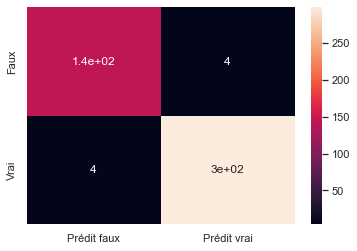

In [85]:
sns.heatmap(conf, annot=True)

In [86]:
#print accuracy of model
print(metrics.accuracy_score(ytest,y_pred))

#print precision value of model
print(metrics.precision_score(ytest,y_pred))

#print recall value of model
print(metrics.recall_score(ytest,y_pred))



0.9822222222222222
0.9867986798679867
0.9867986798679867


## kmean

In [87]:
df_kmean=xtrain
df_kmean_test=xtest

In [88]:
from sklearn import decomposition
X = df_kmean.values
XT=df_kmean_test.values
#Centrer réduire 
std_scale = preprocessing.StandardScaler().fit(X)
std_scale_test = preprocessing.StandardScaler().fit(XT)
X_scaled = std_scale.transform(X)
X_scaled_test = std_scale.transform(XT)

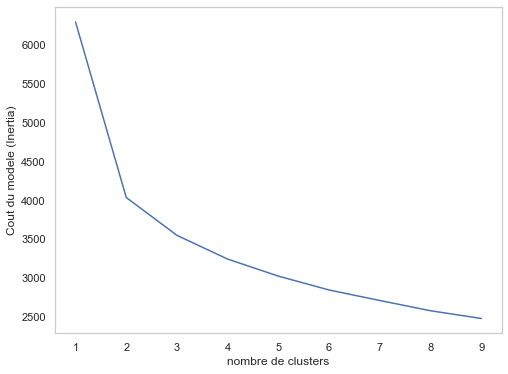

Inertie totale : 2481.2385960273577


In [89]:
inertia = []
k_range=range(1,10)
for k in k_range:
    modelkm=KMeans(n_clusters=k).fit(X_scaled)
    inertia.append(modelkm.inertia_)
   
fig = plt.figure(figsize=(8,6))
plt.plot(k_range,inertia )
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.grid() 
plt.show()
print('Inertie totale :',modelkm.inertia_)

In [90]:
from sklearn import cluster, metrics
# Nous déffinissons 2 clusters pour notre modèle et entrainons le sur le jeu d'entrainement
model_km = KMeans(n_clusters=2)
km=model_km.fit(X_scaled)
#km.predict(X_scaled)

# évaluer avec le jeu de test
h=km.predict(X_scaled_test)

# inverser les valeur tel que vrai billet=1 et faux billet=0
a = 1-h
#ypred.inertia_
print('Inertie totale :',km.inertia_)

Inertie totale : 4039.0082523413416


In [91]:
conf_kmean = confusion_matrix(ytest,a)

In [92]:
conf_kmean=pd.DataFrame(conf_kmean)

In [93]:
conf_kmean.rename(columns = {0: 'Interprété faux', 1: 'Interprété faux'},inplace = True)
conf_kmean.rename(index = {0: 'Faux', 1: 'Vrai'}, inplace = True)

In [94]:
conf_kmean

,Interprété faux,Interprété faux
Faux,4,143
Vrai,298,5


<AxesSubplot:>

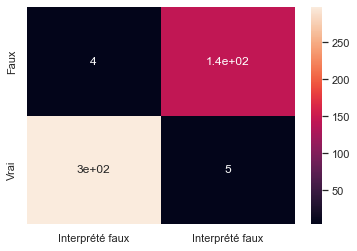

In [95]:
# WARNING CORRECTION INTITUTLE 


sns.heatmap(conf_kmean, annot=True)

In [96]:
# Je choisit la régression logistique dont la matrice de confusion sur la base test indique moins d'erreur
# Si on avait choisit Kmeans ou Knn, on aurait recalculé les centroides.




In [ ]:
# CONSTRUCTION DE L'ALGORITHME DE DETECTION 

In [98]:
def app_billet(df):
    df= sm.add_constant(df)
    df= df[["const","margin_low", "margin_up", "length"]]
    df["proba"] = reslogi2.predict(df)
    df["pred"] = (df["proba"] >= 0.5).astype(int)
    prediction=df[["pred"]]
    return prediction

Test de la fonction 

In [99]:
# farie un read pour la récupération du fichier fournit
billet_comp
x=app_billet(billet_comp)

In [101]:
x

,pred
0,1
1,1
2,1
3,1
4,1
...,...
1303,0
1315,0
1347,0
1435,0


In [104]:
y=billet_comp.is_genuine
dfessai=x.join(y)

In [106]:
print(pd.crosstab(dfessai.is_genuine, dfessai.pred))

pred          0    1
is_genuine          
False       492    8
True          4  996
